# Visualizing the Movies Dataset

In this notebook, you will explore the movies dataset. This dataset has a number of variables for over 3000 movies.

## Imports

In [1]:
import altair as alt
alt.enable_mime_rendering()

## Dataset

In [2]:
movies = alt.load_dataset('movies')

In [3]:
movies.head()

Creative_Type Director Distributor  IMDB_Rating  IMDB_Votes  \
0                  None     None    Gramercy          6.1      1071.0   
1                  None     None      Strand          6.9       207.0   
2                  None     None   Lionsgate          6.8       865.0   
3                  None     None   Fine Line          NaN         NaN   
4  Contemporary Fiction     None     Trimark          3.4       165.0   

  MPAA_Rating Major_Genre  Production_Budget Release_Date  \
0           R        None          8000000.0    12-Jun-98   
1           R       Drama           300000.0     7-Aug-98   
2        None      Comedy           250000.0    28-Aug-98   
3        None      Comedy           300000.0    11-Sep-98   
4           R       Drama          1000000.0     9-Oct-98   

   Rotten_Tomatoes_Rating  Running_Time_min               Source  \
0                     NaN               NaN                 None   
1                     NaN               NaN                 None   
2                     NaN               NaN                 None   
3                    13.0               NaN                 None   
4                    62.0               NaN  Original Screenplay   

                        Title  US_DVD_Sales   US_Gross  Worldwide_Gross  
0              The Land Girls           NaN   146083.0         146083.0  
1      First Love, Last Rites           NaN    10876.0          10876.0  
2  I Married a Strange Person           NaN   203134.0         203134.0  
3        Let's Talk About Sex           NaN   373615.0         373615.0  
4                        Slam           NaN  1009819.0        1087521.0

## Blockbuster directors

Create a visualization to answer the following question:

> Which directors have directed the most (by worldwide gross revenue) blockbuster movies (above 500 million) and across which genres?

Build your visualization using:

* Bar marks
* Only include movies with a worldwide gross renevue of over 500 million
* X -> be the total worldwide gross renevue for that director
* Y -> director, sorted by the gross revenue
* Color -> genre

In [4]:
movies[(movies['Release_Date'].str[-2:] > '35') & (movies['Release_Date'].str[-2:] < '45')]

Creative_Type        Director           Distributor  \
16                       None            None                  None   
174             Dramatization  Michael Curtiz          Warner Bros.   
221                   Fantasy            None    RKO Radio Pictures   
337   Multiple Creative Types            None  Walt Disney Pictures   
382                      None            None                   MGM   
400        Historical Fiction    George Cukor                   MGM   
412                      None       John Ford      20th Century Fox   
591                      None            None    Kino International   
924                   Fantasy            None  Walt Disney Pictures   
1045                  Fantasy      King Vidor          Warner Bros.   

      IMDB_Rating  IMDB_Votes MPAA_Rating Major_Genre  Production_Budget  \
16            7.0       451.0        None        None          5200000.0   
174           NaN         NaN        None      Action          1200000.0   
221           5.9      6791.0        None       Drama           134000.0   
337           7.8     29914.0        None     Musical          2280000.0   
382           6.9       869.0        None       Drama          2627000.0   
400           8.2     78947.0           G       Drama          3900000.0   
412           7.9      7420.0        None        None          1250000.0   
591           8.5     35773.0        None      Comedy          1500000.0   
924           7.8     38141.0        None     Musical          1488000.0   
1045          8.3    102795.0           G     Musical          2777000.0   

     Release_Date  Rotten_Tomatoes_Rating  Running_Time_min  \
16       1-Aug-44                     NaN               NaN   
174     20-Oct-36                     NaN               NaN   
221     16-Nov-42                    91.0               NaN   
337     13-Nov-40                    98.0               NaN   
382     24-Dec-43                     NaN               NaN   
400     15-Dec-39                    97.0             222.0   
412     28-Oct-41                    88.0               NaN   
591      5-Feb-36                   100.0               NaN   
924     21-Dec-37                    97.0               NaN   
1045    25-Aug-39                     NaN             103.0   

                            Source                             Title  \
16                            None                            Wilson   
174      Based on Real Life Events  Charge of the Light Brigade, The   
221            Original Screenplay                        Cat People   
337                    Compilation                          Fantasia   
382            Original Screenplay                   A Guy Named Joe   
400      Based on Book/Short Story                Gone with the Wind   
412      Based on Book/Short Story           How Green Was My Valley   
591                           None                      Modern Times   
924   Traditional/Legend/Fairytale   Snow White and the Seven Dwarfs   
1045     Based on Book/Short Story                  The Wizard of Oz   

      US_DVD_Sales     US_Gross  Worldwide_Gross  
16             NaN    2000000.0        2000000.0  
174            NaN          0.0              0.0  
221            NaN    4000000.0        8000000.0  
337            NaN   83320000.0       83320000.0  
382            NaN    5363000.0        5363000.0  
400            NaN  198680470.0      390525192.0  
412            NaN          0.0              0.0  
591            NaN     163245.0         163245.0  
924            NaN  184925485.0      184925485.0  
1045           NaN   28202232.0       28202232.0

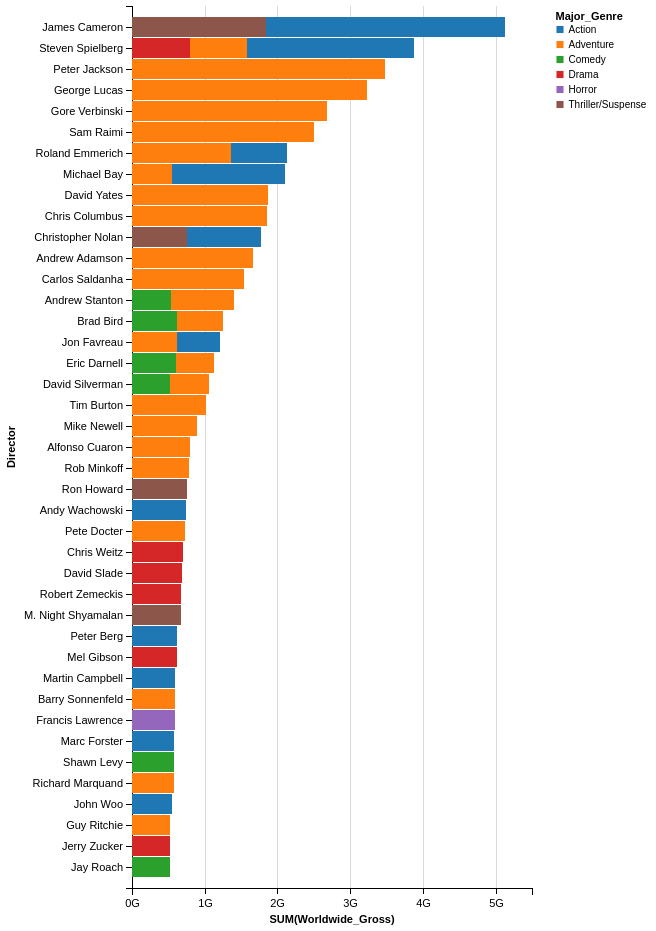

In [11]:
alt.Chart(movies[movies['Worldwide_Gross'] > 5e8]).mark_bar().encode(
    alt.X('sum(Worldwide_Gross)'),
    alt.Y('Director:N', sort=alt.SortField(field='Worldwide_Gross', op='sum', order='descending')),
    alt.Color('Major_Genre')
).transform_data(
    filter='datum.Director != null',
)


## Production versus gross

Create a visualization that answers the following question:

> How does the production budget affect the worldwide gross and how does the genre affect that?

Build your visualization using:

* Point marks
* X -> production budget on a log scale
* Y -> worldwide gross on a log scale
* Color -> genre

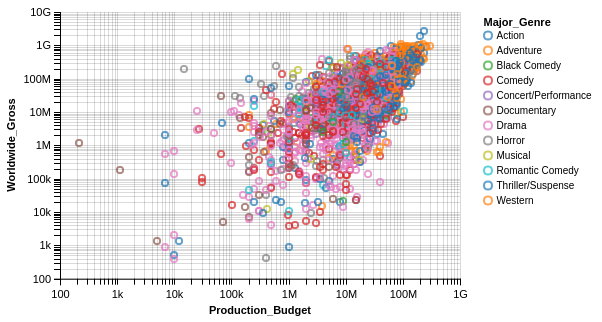

In [6]:
alt.Chart(movies).mark_point().encode(
    alt.X('Production_Budget', scale=alt.Scale(type='log')),
    alt.Y('Worldwide_Gross', scale=alt.Scale(type='log')),
    alt.Color('Major_Genre')
).transform_data(
    filter='datum.Major_Genre != null'
)

## Worldwide gross over time

Create a visualization that answers the following question:

> How has the average worldwide gross revenue changed over time?

Build your visualization using:

* Line mark
* X -> year of release date
* Y -> average worldwide gross

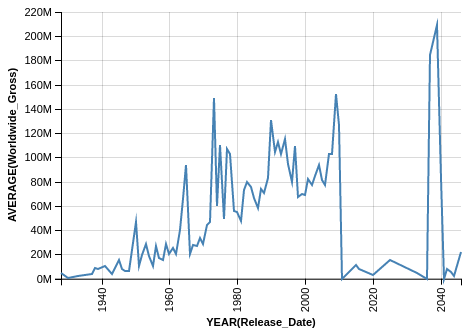

In [7]:
#movies['DateTime']=movies['Release_Date']
alt.Chart(movies).mark_line().encode(
    alt.X('Release_Date:T', timeUnit='year'),
    alt.Y('average(Worldwide_Gross)'),
)

## Distribution of ratings by genre

Create a visualization that answers the following question:

> How are the Rotten Tomotoes ratings distributed

Build your visualization using:

* Bar mark
* X -> binned Rotten Tomatoes rating with at most 50 bins
* Y -> number of records, with 5 labeled ticks
* Row -> genre
* Make the height of each cell smaller (`100px`)

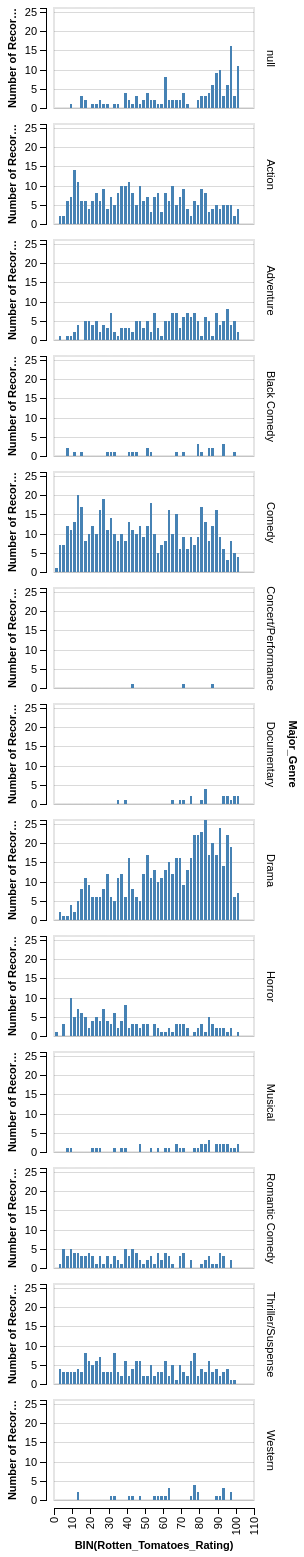

In [8]:
alt.Chart(movies).mark_bar().encode(
    alt.X('Rotten_Tomatoes_Rating', bin=alt.Bin(maxbins=50)),
    alt.Y('count(*)', axis=alt.Axis(ticks=5)),
    alt.Row('Major_Genre')
).configure_cell(
    height=100
)

Explore the previous question with a different visualization using:

* Tick mark
* X -> Rotten Tomatoes rating
* Y -> genre

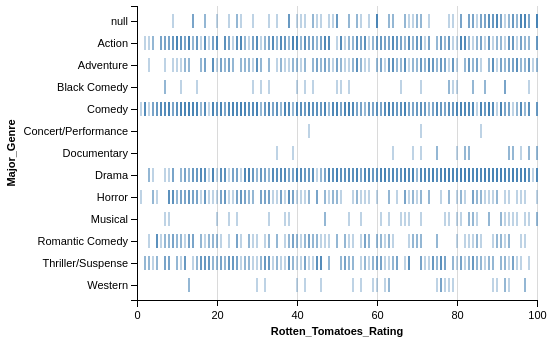

In [9]:
alt.Chart(movies).mark_tick().encode(
    alt.X('Rotten_Tomatoes_Rating'),
    alt.Y('Major_Genre')
)